In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import cv2
from urllib.request import urlopen
import dlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [6]:
points_arr = [(0, 1), (0, 17), (0, 36)
        , (1, 2), (1, 36), (1, 41)
        , (2, 3), (2, 31), (2, 41)
        , (3, 4), (3, 31), (3, 48)
        , (4, 5), (4, 48)
        , (5, 6), (5, 48)
        , (6, 7), (6, 48), (6, 59)
        , (7, 8), (7, 58), (7, 59)
        , (8, 9), (8, 56), (8, 57), (8, 58)
        , (9, 10), (9, 55), (9, 56)
        , (10, 11), (10, 54), (10, 55)
        , (11, 12), (11, 54)
        , (12, 13), (12, 54)
        , (13, 14), (13, 35), (13, 54)
        , (14, 15), (14, 35), (14, 46)
        , (15, 16), (15, 45), (15, 46)
        , (16, 26), (16, 45)
        , (17, 18), (17, 36)
        , (18, 19), (18, 36), (18, 37)
        , (19, 20), (19, 37), (19, 38)
        , (20, 21), (20, 23), (20, 38), (20, 39)
        , (21, 22), (21, 23), (21, 27), (21, 39)
        , (22, 23), (22, 27), (22, 42)
        , (23, 24), (23, 42), (23, 43)
        , (24, 25), (24, 43), (24, 44)
        , (25, 26), (25, 44), (25, 45)
        , (26, 45)
        , (27, 28), (27, 39), (27, 42)
        , (28, 29), (28, 39), (28, 42)
        , (29, 30), (29, 31), (29, 35), (29, 39), (29, 40), (29, 42), (29, 47)
        , (30, 31), (30, 32), (30, 33), (30, 34), (30, 35)
        , (31, 32), (31, 40), (31, 41), (31, 48), (31, 49), (31, 50)
        , (32, 33), (32, 50), (32, 51)
        , (33, 34), (33, 51)
        , (34, 35), (34, 51), (34, 52)
        , (35, 46), (35, 47), (35, 52), (35, 53), (35, 54)
        , (36, 37), (36, 41)
        , (37, 38), (37, 40), (37, 41)
        , (38, 39), (38, 40)
        , (39, 40)
        , (40, 41)
        , (42, 43), (42, 47)
        , (43, 44), (43, 47)
        , (44, 45), (44, 46),(44,47)
        , (45, 46)
        , (46, 47)
        , (48, 49), (48, 59), (48, 60)
        , (49, 50), (49, 60), (49, 61)
        , (50, 51), (50, 61), (50, 62)
        , (51, 52), (51, 62)
        , (52, 53), (52, 62), (52, 63)
        , (53, 54), (53, 63), (53, 64)
        , (54, 55), (54, 64)
        , (55, 56), (55, 64), (55, 65)
        , (56, 57), (56, 65), (56, 66)
        , (57, 58), (57, 66)
        , (58, 59), (58, 66), (58, 67)
        , (59, 60), (59, 67)
        , (60, 61), (60, 67)
        , (61, 62), (61, 66), (61, 67)
        , (62, 63), (62, 66)
        , (63, 64), (63, 65), (63, 66)
        , (64, 65)
        , (65, 66)
        , (66, 67)]
num_face_landmarks =68

# In the next cells we are going to show the process that the image is going through


### In the next cell we are going to show the image that we have got from our crawler .

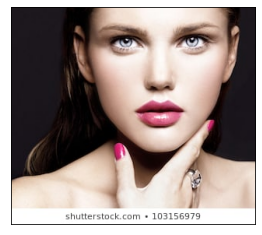

In [7]:
filename = '1_3_103156979.jpg'
img = cv2.imread(filename, 1)  #Best practise is to specify the flag you want set, confirming you want a colour picture.
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(image)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

### In the next cell we are going to show how our face detector capturing the face in the image and selecting the face

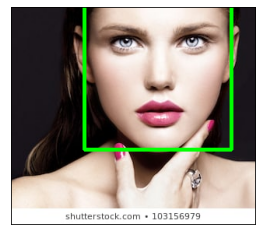

In [8]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = detector(gray)
face = faces[0]
x1 = face.left()
y1 = face.top()
x2 = face.right()+10
y2 = face.bottom()+10
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

### In the next cell we are going to show how the face landmark model that we used drawing points inside the rectangle of the detector / on the face that he recognizes

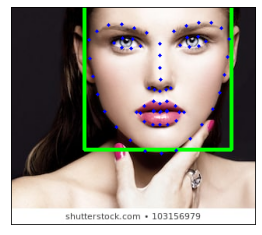

In [9]:
landmarks = predictor(gray, face)
for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    cv2.circle(image, (x, y), 2, (0, 0, 255), -1)
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

### In the next cell we are going to show how did we perform the normalization of the points corresponding to the size of the detector rectangle

In [10]:
for n in range(0, num_face_landmarks):
    print('point_' + str(n) + '_x', (landmarks.part(n).x - face.left()) / (face.right() - face.left()))
    print('point_' + str(n) + '_y', (landmarks.part(n).y - face.top()) / (face.bottom() - face.top()))
    print("")
dict = {'point_' + str(n) + '_x': (landmarks.part(n).x - face.left()) / (face.right() - face.left()) for n
       in range(0, num_face_landmarks)}
dict.update(
   {'point_' + str(n) + '_y': (landmarks.part(n).y - face.top()) / (face.bottom() - face.top()) for n in
    range(0, num_face_landmarks)})

point_0_x 0.0335195530726257
point_0_y 0.3417085427135678

point_1_x 0.03910614525139665
point_1_y 0.4623115577889447

point_2_x 0.061452513966480445
point_2_y 0.5778894472361809

point_3_x 0.09497206703910614
point_3_y 0.6934673366834171

point_4_x 0.1452513966480447
point_4_y 0.8040201005025126

point_5_x 0.22905027932960895
point_5_y 0.9045226130653267

point_6_x 0.329608938547486
point_6_y 0.9899497487437185

point_7_x 0.43575418994413406
point_7_y 1.0603015075376885

point_8_x 0.553072625698324
point_8_y 1.0753768844221105

point_9_x 0.659217877094972
point_9_y 1.0552763819095476

point_10_x 0.7597765363128491
point_10_y 0.9798994974874372

point_11_x 0.8435754189944135
point_11_y 0.8894472361809045

point_12_x 0.9217877094972067
point_12_y 0.7889447236180904

point_13_x 0.9720670391061452
point_13_y 0.6834170854271356

point_14_x 1.005586592178771
point_14_y 0.5678391959798995

point_15_x 1.0279329608938548
point_15_y 0.45226130653266333

point_16_x 1.0391061452513966
point_16_y 

## In the next cells we are going to show which distances we calculated in order to create our dataframe

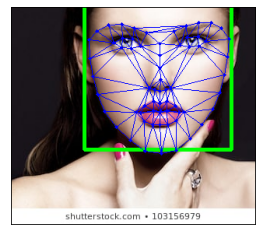

In [11]:
for n in points_arr:
    cv2.line(image, (landmarks.part(n[0]).x, landmarks.part(n[0]).y), (landmarks.part(n[1]).x, landmarks.part(n[1]).y), (0, 0, 255), 1)
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
for num, points in enumerate(points_arr):
    s1x = dict["point_" + str(points[0]) + '_x']
    s1y = dict["point_" + str(points[0]) + '_y']
    s2x = dict["point_" + str(points[1]) + '_x']
    s2y = dict["point_" + str(points[1]) + '_y']
    print("distance" ,points[0] ,'-', points[1] ," : ", np.sqrt(((s1x - s2x) ** 2) + ((s1y - s2y) ** 2)))

distance 0 - 1  :  0.12073233724832587
distance 0 - 17  :  0.07859058222332144
distance 0 - 36  :  0.17989742261991418
distance 1 - 2  :  0.11771834489079437
distance 1 - 36  :  0.20023380515946615
distance 1 - 41  :  0.23961093553170063
distance 2 - 3  :  0.12034038793051206
distance 2 - 31  :  0.40923633490238676
distance 2 - 41  :  0.27802219472271666
distance 3 - 4  :  0.12144926749044228
distance 3 - 31  :  0.3709001669261518
distance 3 - 48  :  0.3022966737475611
distance 4 - 5  :  0.13085491114252137
distance 4 - 48  :  0.2291053957211625
distance 5 - 6  :  0.13194635066538032
distance 5 - 48  :  0.17382145910123112
distance 6 - 7  :  0.12734278291078194
distance 6 - 48  :  0.18634346535594687
distance 6 - 59  :  0.15702589337102565
distance 7 - 8  :  0.1182830603088091
distance 7 - 58  :  0.17975589909109535
distance 7 - 59  :  0.1910364773431118
distance 8 - 9  :  0.10803168329390758
distance 8 - 56  :  0.19122571708350453
distance 8 - 57  :  0.18626506420632463
distance 8 - 5

# correlations

In [13]:
df = pd.read_csv(r"vectored_data.csv")

In [14]:
del df['Unnamed: 0']

In [15]:
df.head()

,distance_0_1,distance_0_17,distance_0_36,distance_1_2,distance_1_36,distance_1_41,distance_2_3,distance_2_31,distance_2_41,distance_3_4,...,distance_61_67,distance_62_63,distance_62_66,distance_63_64,distance_63_65,distance_63_66,distance_64_65,distance_65_66,distance_66_67,is_female
0,0.111871,0.206023,0.272371,0.128492,0.331921,0.358675,0.126039,0.440527,0.448496,0.132439,...,0.078212,0.046068,0.067039,0.099936,0.072626,0.090081,0.093648,0.045041,0.050589,0
1,0.111732,0.140000,0.192393,0.117849,0.261199,0.301158,0.124042,0.349999,0.381241,0.123664,...,0.067271,0.062460,0.067271,0.139665,0.067271,0.096115,0.149904,0.062460,0.061706,0
2,0.129580,0.130420,0.191254,0.124920,0.229663,0.252944,0.122013,0.347089,0.318485,0.117849,...,0.000000,0.050589,0.000000,0.118510,0.005587,0.050589,0.117849,0.051506,0.050589,1
3,0.101122,0.105528,0.080696,0.105675,0.159471,0.168252,0.093172,0.195595,0.252228,0.105945,...,0.016077,0.056091,0.020862,0.179405,0.020101,0.056208,0.182199,0.050530,0.050530,1
4,0.092145,0.080483,0.062901,0.092430,0.112660,0.118492,0.102574,0.199832,0.189073,0.097947,...,0.005917,0.038575,0.009356,0.112971,0.013231,0.037424,0.109508,0.037889,0.034503,1


In [16]:
def mean_distance(df,tuples):
    female_data = df.loc[df['is_female'] == 1]
    male_data = df.loc[df['is_female'] == 0]
    female_dist_sum = pd.Series(data = np.zeros(female_data.shape[0]))
    male_dist_sum = pd.Series(data = np.zeros(male_data.shape[0]))
    for tup in tuples:
        female_dist_sum = female_dist_sum + female_data['distance_' + str(tup[0]) +'_' + str(tup[1])]
        male_dist_sum = male_dist_sum + male_data['distance_' + str(tup[0]) +'_' + str(tup[1])]
    return female_dist_sum.mean() , male_dist_sum.mean()


In [17]:
avg_lips_size_female,avg_lips_size_male = mean_distance(df,[(57,66),(51,62)])
print(avg_lips_size_female)
print(avg_lips_size_male)

0.10699695343834212
0.10020073591493629


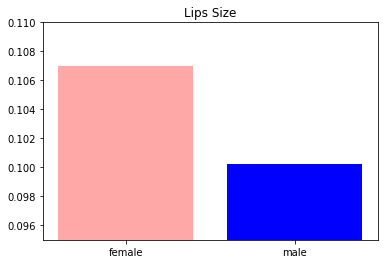

In [18]:
x = ['female' , 'male']
y = [avg_lips_size_female , avg_lips_size_male ]
fig = plt.figure()
plt.bar(x,y , color = [(1,0.66,0.66) , (0,0,1)])
plt.title('Lips Size')
plt.ylim([0.095,0.11])
plt.show()

In [19]:
avg_eye_dist_female,avg_eye_dist_male = mean_distance(df,[(27,39),(27,42)])
print(avg_eye_dist_female)
print(avg_eye_dist_male)

0.2632745688296629
0.2604487650277144


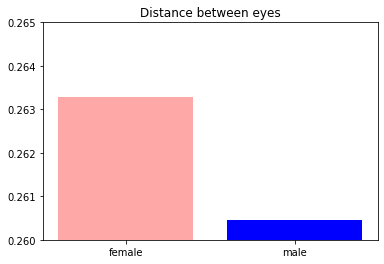

In [20]:
x = ['female' , 'male']
y = [avg_eye_dist_female , avg_eye_dist_male]
fig = plt.figure()
plt.bar(x,y , color = [(1,0.66,0.66) , (0,0,1)])
plt.title('Distance between eyes')
plt.ylim([0.26,0.265])
plt.show()

In [21]:
avg_face_size_female,avg_face_size_male = mean_distance(df,[(8,57),(57,66),(62,66),(51,62),(33,51),(30,33),(33,51),(29,30),(28,29),(27,28),(21,27)])
print(avg_face_size_female)
print(avg_face_size_male)

0.9830578828933615
0.9982356535017278


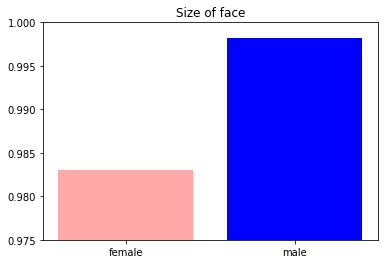

In [22]:
x = ['female' , 'male']
y = [avg_face_size_female , avg_face_size_male]
fig = plt.figure()
plt.bar(x,y , color = [(1,0.66,0.66) , (0,0,1)])
plt.title('Size of face')
plt.ylim([0.975,1])
plt.show()

In [23]:
tuple_list = [(i,i+1) for i in range(0,16)]
tuple_list.append((0,17))
tuple_list.append((16,26))
avg_perimeter_female,avg_perimeter_male = mean_distance(df,tuple_list)
print(avg_perimeter_female)
print(avg_perimeter_male)

2.286468711511633
2.2737253058013445


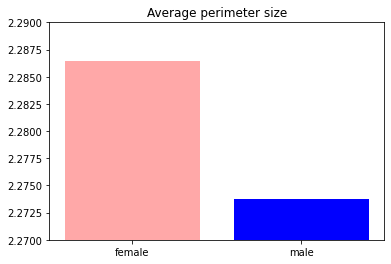

In [24]:
x = ['female' , 'male']
y = [avg_perimeter_female , avg_perimeter_male]
fig = plt.figure()
plt.bar(x,y , color = [(1,0.66,0.66) , (0,0,1)])
plt.title('Average perimeter size')
plt.ylim([2.27,2.29])
plt.show()

In [25]:
tuple_list = [(i,i+1) for i in range(27,35)]
tuple_list.append((30,35))
avg_nose_size_female,avg_nose_size_male = mean_distance(df,[(27,28),(28,29),(62,66),(51,62),(33,51),(30,33),(33,51),(29,30),(28,29),(27,28),(21,27)])
print(avg_nose_size_female)
print(avg_nose_size_male)

0.8818512376718685
0.8735554935853649


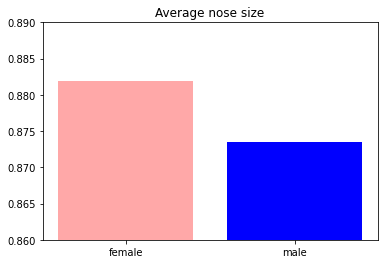

In [26]:
x = ['female' , 'male']
y = [avg_nose_size_female , avg_nose_size_male]
fig = plt.figure()
plt.bar(x,y , color = [(1,0.66,0.66) , (0,0,1)])
plt.title('Average nose size')
plt.ylim([0.86,0.89])
plt.show()

In [27]:
avg_eye_vs_nose_dist_female,avg_eye_vs_nose_dist_male = mean_distance(df,[(31,41),(31,40),(35,46),(35,47)])
print(avg_eye_vs_nose_dist_female)
print(avg_eye_vs_nose_dist_male)

1.20842480008409
1.162770204756046


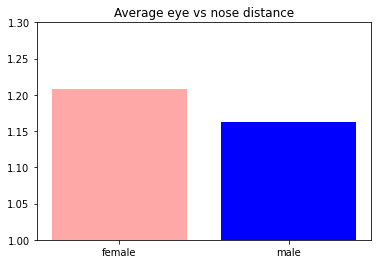

In [28]:
x = ['female' , 'male']
y = [avg_eye_vs_nose_dist_female , avg_eye_vs_nose_dist_male]
fig = plt.figure()
plt.bar(x,y , color = [(1,0.66,0.66) , (0,0,1)])
plt.title('Average eye vs nose distance')
plt.ylim([1,1.3])
plt.show()

# model performance comparison

In [29]:
def print_score(clf, x, y):
    y_pred = clf.predict(x)
    matrix = metrics.confusion_matrix(y_true=y, y_pred=y_pred)
    print(matrix)
    accuracy = metrics.accuracy_score(y, y_pred)
    print("\t accuracy is:", accuracy)
    return accuracy
    
def score_compare(clf, model_name, x_train, x_test, y_train, y_test):
    print(model_name, ':')
    if hasattr(clf, 'best_params_'):
        print(clf.best_params_)
    print("train score:")
    accuracy_train = print_score(clf, x_train, y_train)
    print("test score:")
    accuracy_test = print_score(clf, x_test, y_test)
    return accuracy_train , accuracy_test

In [30]:
x_col = df.columns[(df.columns != 'is_female')]
x = df[x_col]
y = df['is_female']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [32]:
scaler = StandardScaler()
x_scale_train = scaler.fit_transform(x_train)
x_scale_test = scaler.transform(x_test)
pca = PCA(n_components=130,whiten=True).fit(x_scale_train)
x_train_pca = pca.transform(x_scale_train)
x_test_pca = pca.transform(x_scale_test)

### LinearRegression

In [33]:
clf = LogisticRegression(max_iter=5000).fit(x_train_pca, y_train)
LogisticRegression_accuracy = score_compare(clf, 'Logistic Regression', x_train_pca, x_test_pca, y_train, y_test)


Logistic Regression :
train score:
[[8273 1381]
 [1372 7534]]
	 accuracy is: 0.8516702586206897
test score:
[[2096  354]
 [ 358 1832]]
	 accuracy is: 0.846551724137931


### Decision Tree

In [34]:
parameters = {'max_depth': [2], 'min_samples_split': [10]} #bast
clf = DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(x_train_pca, y_train)
DecisionTree_accuracy = score_compare(clf, 'Decision Tree', x_train_pca, x_test_pca, y_train, y_test)

Decision Tree :
{'max_depth': 2, 'min_samples_split': 10}
train score:
[[7238 2416]
 [2661 6245]]
	 accuracy is: 0.7264547413793103
test score:
[[1843  607]
 [ 667 1523]]
	 accuracy is: 0.7254310344827586


### Random Forest

In [35]:
clf = RandomForestClassifier(bootstrap=True, max_depth=20 , max_features = 'sqrt',min_samples_leaf=2,min_samples_split=5,n_estimators=400)
clf.fit(x_scale_train, y_train)
RandomForest_accuracy = score_compare(clf, 'Random Forest', x_scale_train, x_scale_test, y_train, y_test)

Random Forest :
train score:
[[9581   73]
 [  61 8845]]
	 accuracy is: 0.9927801724137931
test score:
[[2058  392]
 [ 421 1769]]
	 accuracy is: 0.8247844827586207


### Naive Bayes

In [37]:
gnb = GaussianNB().fit(x_scale_train, y_train)
naive_bayes_accuracy = score_compare(clf, 'Naive Bayes', x_scale_train, x_scale_test, y_train, y_test)

Naive Bayes :
train score:
[[9581   73]
 [  61 8845]]
	 accuracy is: 0.9927801724137931
test score:
[[2058  392]
 [ 421 1769]]
	 accuracy is: 0.8247844827586207


### KNN

In [38]:
parameters = {'n_neighbors': [17]} #bast
knn_clf = clf = KNeighborsClassifier().fit(x_scale_train, y_train)
knn_clf_accuracy = score_compare(knn_clf, 'KNN', x_scale_train, x_scale_test, y_train, y_test)

KNN :
train score:
[[8305 1349]
 [1176 7730]]
	 accuracy is: 0.8639547413793104
test score:
[[1975  475]
 [ 450 1740]]
	 accuracy is: 0.8006465517241379


### SVM

In [39]:
clf = SVC(kernel='linear', class_weight = 'balanced',C = 1e3,gamma = 0.0001)
clf.fit(x_train_pca, y_train)
SVC_accuracy = score_compare(clf, 'SVM', x_train_pca, x_test_pca, y_train, y_test)

SVM :
train score:
[[8178 1476]
 [1244 7662]]
	 accuracy is: 0.853448275862069
test score:
[[2077  373]
 [ 326 1864]]
	 accuracy is: 0.8493534482758621


### Neural Network

In [43]:
clf = MLPClassifier(solver='sgd', learning_rate='adaptive', hidden_layer_sizes=(100,),activation='relu', batch_size=4)
clf.fit(x_scale_train, y_train)
NeuralNetwork_accuracy = score_compare(clf, 'Neural Network', x_scale_train, x_scale_test, y_train, y_test)

Neural Network :
train score:
[[9218  436]
 [ 316 8590]]
	 accuracy is: 0.9594827586206897
test score:
[[2025  425]
 [ 397 1793]]
	 accuracy is: 0.8228448275862069


c:\users\97254\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## comparison

Figure(720x432)


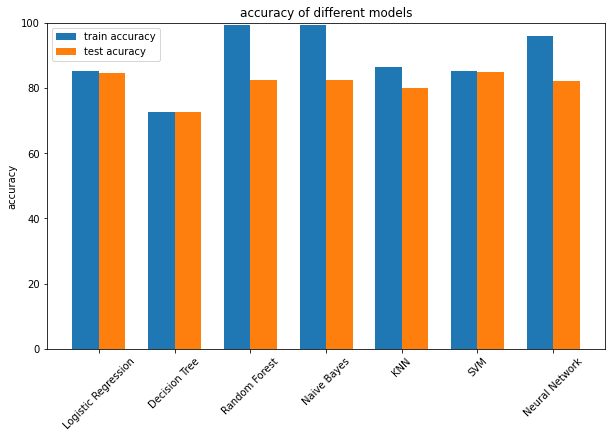

In [44]:
labels = ['Logistic Regression', 'Decision Tree','Random Forest' ,'Naive Bayes', 'KNN','SVM', 'Neural Network']
train_accuracy = [LogisticRegression_accuracy[0]*100, DecisionTree_accuracy[0]*100, RandomForest_accuracy[0]*100,naive_bayes_accuracy[0]*100,knn_clf_accuracy[0]*100,SVC_accuracy[0]*100,NeuralNetwork_accuracy[0]*100]
test_acuracy = [LogisticRegression_accuracy[1]*100, DecisionTree_accuracy[1]*100, RandomForest_accuracy[1]*100, naive_bayes_accuracy[1]*100,knn_clf_accuracy[1]*100,SVC_accuracy[1]*100,NeuralNetwork_accuracy[1]*100]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, train_accuracy, width, label='train accuracy')
rects2 = ax.bar(x + width/2, test_acuracy, width, label='test acuracy')
ax.set_ylabel('accuracy')
ax.set_title('accuracy of different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0,100])
plt.xticks(rotation='45')
ax.legend()
print(fig)
